In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Đọc dữ liệu vào df_A Tạo 2 dataframe df_train, df_test từ df_train df_train: 80% ngẫu nhiên được lấy từ df_A df_test: 20% còn lại

df_A = pd.read_csv('./exFuelConsumption.csv')
df_A.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2014,ACURA,ILX,2.0,4,9.9,196
1,2014,ACURA,ILX,2.4,4,11.2,221
2,2014,ACURA,ILX HYBRID,1.5,4,6.0,136
3,2014,ACURA,MDX 4WD,3.5,6,12.7,255
4,2014,ACURA,RDX AWD,3.5,6,12.1,244


In [3]:
df_train = df_A.sample(frac = 0.8)
df_train.head()


,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
256,2014,CHEVROLET,SONIC 5 RS,1.4,4,8.7,182
183,2014,CADILLAC,SRX,3.6,6,14.3,283
356,2014,FORD,ESCAPE,1.6,4,10.4,209
645,2014,LAND ROVER,RANGE ROVER SPORT V6 3.0 SC FFV,3.0,6,19.4,278
1042,2014,VOLKSWAGEN,JETTA TURBO HYBRID,1.4,4,5.6,124


In [4]:
df_test = df_A[~df_A.isin(df_train)].dropna()
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
1,2014.0,ACURA,ILX,2.4,4.0,11.2,221.0
8,2014.0,ACURA,TL AWD,3.7,6.0,13.4,267.0
10,2014.0,ACURA,TSX,2.4,4.0,11.2,225.0
13,2014.0,ASTON MARTIN,RAPIDE,5.9,12.0,18.0,359.0
14,2014.0,ASTON MARTIN,V8 VANTAGE,4.7,8.0,17.4,338.0


In [5]:
from numpy import linalg

# 2. Sử dụng ma trận giả đảo để dự báo CO2 Emission theo 3 features Enginesize, Cylinders, FuelConsumption theo từng bước sau:
X = df_train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY
256,1.4,4,8.7
183,3.6,6,14.3
356,1.6,4,10.4
645,3.0,6,19.4
1042,1.4,4,5.6


In [6]:
X_inv = linalg.pinv(X)
X_inv

array([[-3.49508179e-03,  5.45199315e-05, -3.04541283e-03, ...,
         6.34220600e-03,  2.49009612e-04, -1.22974307e-03],
       [ 1.96233092e-03, -1.28682745e-04,  1.08619104e-03, ...,
        -2.32284467e-03, -1.54465784e-03,  9.23823023e-04],
       [ 1.03169586e-04,  1.27059684e-04,  3.73444865e-04, ...,
        -5.21224562e-04,  7.31523570e-04, -2.53901645e-06]])

In [7]:
y = df_train['CO2EMISSIONS']
y.head()

256     182
183     283
356     209
645     278
1042    124
Name: CO2EMISSIONS, dtype: int64

In [8]:
w = X_inv @ y
w

array([-8.05956496, 21.2444439 , 11.7598516 ])

In [9]:
w_engine_size = w[0]
w_cylinders = w[1]
w_fuel_consumption = w[2]

In [10]:
df_test['prediction_1'] = df_test['ENGINESIZE']*w_engine_size + df_test['CYLINDERS']*w_cylinders + df_test['FUELCONSUMPTION_CITY']*w_fuel_consumption
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,prediction_1
1,2014.0,ACURA,ILX,2.4,4.0,11.2,221.0,197.345158
8,2014.0,ACURA,TL AWD,3.7,6.0,13.4,267.0,255.228285
10,2014.0,ACURA,TSX,2.4,4.0,11.2,225.0,197.345158
13,2014.0,ASTON MARTIN,RAPIDE,5.9,12.0,18.0,359.0,419.059222
14,2014.0,ASTON MARTIN,V8 VANTAGE,4.7,8.0,17.4,338.0,336.697014


<AxesSubplot:>

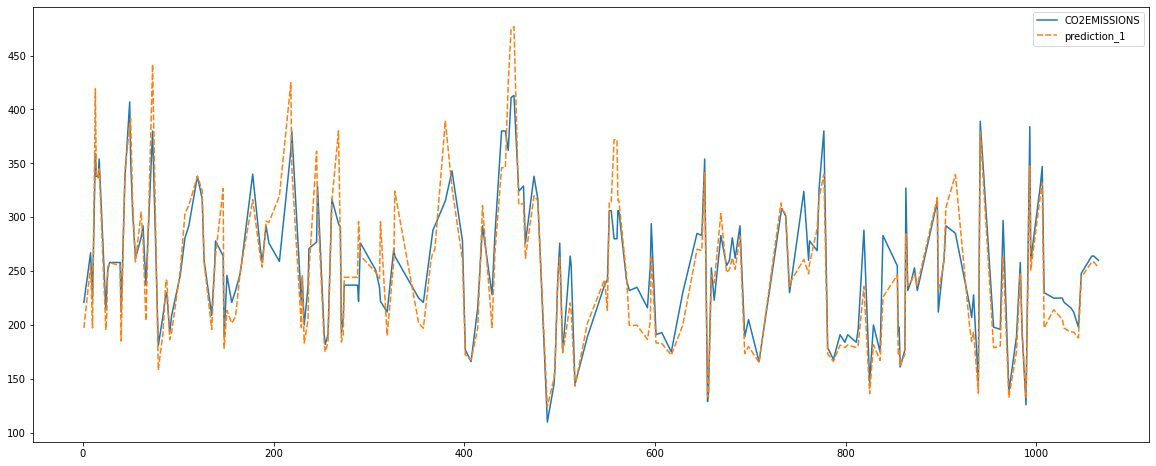

In [11]:
plt.figure(figsize=(20,8))
df_co2_pre_1 = df_test[['CO2EMISSIONS', 'prediction_1']]
sns.lineplot(data=df_co2_pre_1)

In [12]:
import sympy

x = sympy.Symbol('x')
y = sympy.Symbol('y')
z = sympy.Symbol('z')
theta = np.ones(4)
t = np.dot(np.array([1, x, y, z]), theta)
t


1.0*x + 1.0*y + 1.0*z + 1.0

In [13]:
# 3. Sử dụng Gradient Descent với 3 features Enginesize, Cylinders, FuelConsumption tính CO2 Emission
def gradient_descent_3(alpha, x, y, numIterations):
    m = x.shape[0]
    print('m:', m)
    theta = np.ones(x.shape[1])
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        theta0_prime = np.sum(loss)/m
        theta1_prime = np.sum(loss * x[:, 1])/m
        theta2_prime = np.sum(loss * x[:, 2])/m
        theta3_prime = np.sum(loss * x[:, 3])/m

        gradient = np.array([theta0_prime, theta1_prime, theta2_prime, theta3_prime])
        theta = theta - alpha * gradient
        if iter == 0:
            print('hypothesis:\n', hypothesis)
            print('loss:\n', loss)
            print('gradient:\n', gradient)
            print('theta:\n', theta)
    return theta

In [14]:
alpha = 0.00002
m, n = np.shape(X)
print('m', m)
print('n', n)
X = df_train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
print('X', X)
x = np.c_[np.ones(m), X]
print('x', x)
y = df_train['CO2EMISSIONS']
print('y', y)
theta = gradient_descent_3(alpha, x, y, 1000)

print('final theta', theta)

m 854
n 3
X       ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY
256          1.4          4                   8.7
183          3.6          6                  14.3
356          1.6          4                  10.4
645          3.0          6                  19.4
1042         1.4          4                   5.6
...          ...        ...                   ...
501          3.5          6                  15.2
907          4.8          8                  15.3
301          6.4          8                  16.7
390          5.0          8                  22.4
1063         3.2          6                  13.2

[854 rows x 3 columns]
x [[ 1.   1.4  4.   8.7]
 [ 1.   3.6  6.  14.3]
 [ 1.   1.6  4.  10.4]
 ...
 [ 1.   6.4  8.  16.7]
 [ 1.   5.   8.  22.4]
 [ 1.   3.2  6.  13.2]]
y 256     182
183     283
356     209
645     278
1042    124
       ... 
501     308
907     294
301     317
390     318
1063    264
Name: CO2EMISSIONS, Length: 854, dtype: int64
m: 854
hypothesis:
 [15.1 24.9 17.  29

In [15]:
theta_zero = theta[0]
theta_engine_size = theta[1]
theta_cylinders = theta[2]
theta_fuel_consumption = theta[3]

df_test['prediction_2'] = df_test['ENGINESIZE']*theta_engine_size + df_test['CYLINDERS']*theta_cylinders + df_test['FUELCONSUMPTION_CITY']*theta_fuel_consumption + theta_zero
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,prediction_1,prediction_2
1,2014.0,ACURA,ILX,2.4,4.0,11.2,221.0,197.345158,202.211043
8,2014.0,ACURA,TL AWD,3.7,6.0,13.4,267.0,255.228285,253.714663
10,2014.0,ACURA,TSX,2.4,4.0,11.2,225.0,197.345158,202.211043
13,2014.0,ASTON MARTIN,RAPIDE,5.9,12.0,18.0,359.0,419.059222,371.790833
14,2014.0,ASTON MARTIN,V8 VANTAGE,4.7,8.0,17.4,338.0,336.697014,329.837076
